# Working with data from PANGAEA
We show the use of R packages for PANGAEA datasets. We are usinga a CTD dataset from Gerd Rohardt https://doi.pangaea.de/10.1594/PANGAEA.734969.

## Using pangaear
pangaear is a library provided by ropensci. See https://ropensci.org/tutorials/pangaear_tutorial/ and https://github.com/ropensci/pangaear.

In [1]:
install.packages("pangaear")
library("pangaear")

Installing package into ‘/home/edvs1/rkoppe/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [2]:
res <- pg_data(doi = '10.1594/PANGAEA.734969')
#res[[1]]

Processing 1 files


In [3]:
str(res)

List of 1
 $ :List of 6
  ..$ parent_doi: chr "10.1594/PANGAEA.734969"
  ..$ doi       : chr "10.1594/PANGAEA.734969"
  ..$ citation  : chr NA
  ..$ url       : chr "https://doi.org/10.1594/PANGAEA.734969"
  ..$ path      : chr "/home/edvs1/rkoppe/.cache/pangaear/10_1594_PANGAEA_734969.txt"
  ..$ data      :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	23968 obs. of  12 variables:
  .. ..$ Event                : chr [1:23968] "PS04/223-1" "PS04/223-1" "PS04/223-1" "PS04/223-1" ...
  .. ..$ Date/Time            : chr [1:23968] "1983-11-25T16:43" "1983-11-25T16:43" "1983-11-25T16:43" "1983-11-25T16:43" ...
  .. ..$ Latitude             : num [1:23968] -61 -61 -61 -61 -61 ...
  .. ..$ Longitude            : num [1:23968] -58.5 -58.5 -58.5 -58.5 -58.5 ...
  .. ..$ Elevation [m]        : int [1:23968] -5053 -5053 -5053 -5053 -5053 -5053 -5053 -5053 -5053 -5053 ...
  .. ..$ Depth water [m]      : num [1:23968] 4 5.9 7.9 9.9 11.9 13.9 15.8 17.8 19.8 21.8 ...
  .. ..$ Press [dbar]         : int [1

In [4]:
data <- as.data.frame(res[[1]]$data)
#data

In [5]:
head(data)

Event,Date/Time,Latitude,Longitude,Elevation [m],Depth water [m],Press [dbar],Temp [°C],Cond [mS/cm],Sal,Tpot [°C],Sigma-theta [kg/m**3]
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,4.0,4,-0.2719,27.9877,33.907,-0.2720,27.2371
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,5.9,6,-0.2859,27.9806,33.912,-0.2861,27.2418
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,7.9,8,-0.3009,27.9720,33.916,-0.3011,27.2457
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,9.9,10,-0.3109,27.9676,33.920,-0.3112,27.2494
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,11.9,12,-0.3129,27.9691,33.923,-0.3133,27.2520
PS04/223-1,1983-11-25T16:43,-60.9967,-58.5067,-5053,13.9,14,-0.3129,27.9715,33.925,-0.3133,27.2535


Select parameters and format datetime. 

In [6]:
df <- data.frame(
    datetime = as.POSIXct(data[,"Date/Time"], format = "%Y-%m-%dT%H:%M"),
    depth = data[,"Depth water [m]"],
    temperature = data[,"Temp [°C]"])

In [7]:
head(df)

datetime,depth,temperature
1983-11-25 16:43:00,4.0,-0.2719
1983-11-25 16:43:00,5.9,-0.2859
1983-11-25 16:43:00,7.9,-0.3009
1983-11-25 16:43:00,9.9,-0.3109
1983-11-25 16:43:00,11.9,-0.3129
1983-11-25 16:43:00,13.9,-0.3129


Create the plot.

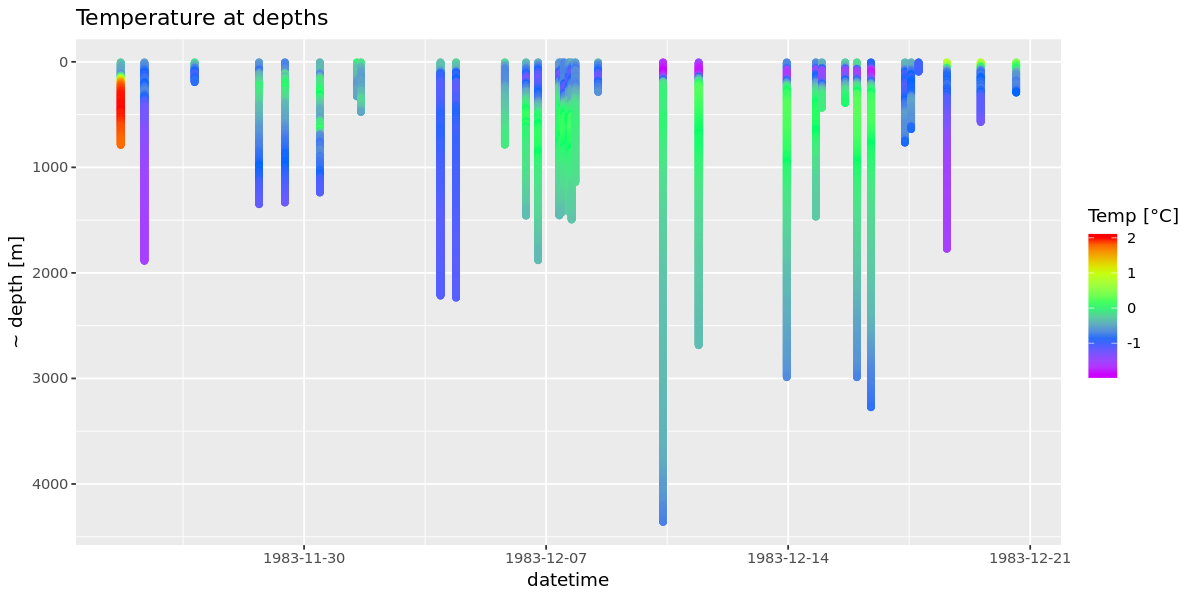

In [8]:
library(ggplot2)
library(scales)

gg <- ggplot(df, aes(datetime, depth)) +
    geom_point(aes(col = temperature)) +
    labs(title = "Temperature at depths", x = "datetime", y = "~ depth [m]") +
    scale_color_gradientn(colors = rev(rainbow(5)), name = "Temp [°C]") +
    scale_x_datetime(labels = date_format("%Y-%m-%d"), date_breaks = "7 days") +
    scale_y_reverse()

options(repr.plot.width = 10, repr.plot.height = 5)
plot(gg)